In [ ]:
import pandas as pd
import numpy as np
from datetime import date


# In[3]:


def get_countries_table():
    url = "https://www.numbeo.com/cost-of-living/rankings_by_country.jsp"
    tables = pd.read_html(url)
    country_table = tables[1]
    del country_table['Rank']
    country_table.to_csv("countries.csv", index=False)
    return country_table


# In[5]:


countries_table = get_countries_table()


# In[6]:


countries_table


# In[7]:


def get_country_info(country):
    country=country.capitalize().replace(' ', '+')
    url = f"https://www.numbeo.com/cost-of-living/country_result.jsp?country={country}&displayCurrency=USD"
    tables = pd.read_html(url)
    country_info_table = tables[1]
    country_info_table.columns = ['Item', 'Price', 'Range']
    return country_info_table

def get_items():
    items = get_country_info("germany")
    return items['Item']


# In[9]:


country_list = countries_table['Country'].values
df = pd.DataFrame()
df['Item'] = get_items()
for country in country_list:
    df[country] = get_country_info(country)['Price']
    print("Scraping Country: "+ country)
df = df[df.Germany!='Edit']


# In[11]:


filename = f"cost_of_living_all-{date.today().strftime('%d-%m-%Y')}.csv"
df.to_csv(filename)

In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import unidecode


In [4]:
cities_table=pd.read_csv('./data/Cities_Per_Population.csv')


cities_list=cities_table['Name'].values


def get_city_info(city):
    url = f"https://www.numbeo.com/cost-of-living/in/{city}?displayCurrency=EUR"
    tables = pd.read_html(url)
    if(len(tables)==5):
        city_info_table = tables[1]
        city_info_table.columns = ['Item', 'Price', 'Range']
        return city_info_table
    elif(len(tables)==6):
    
        city_info_table = tables[2]
        city_info_table.columns = ['Item', 'Price', 'Range']
        return city_info_table
    else:
        return pd.DataFrame()

def get_items():
    items = get_city_info("Paris")
    return items['Item']

In [23]:

df = pd.DataFrame()
df['Item'] = get_items()
for city,idd in l1:
    city=[x.capitalize() for x in city.split()]
    city="-".join(city)
    city=unidecode.unidecode(city)
    res=get_city_info(city)
    if(not res.empty):
        #df[city] = res['Price']
        df[city] = res['Price']
        print("Scraping City: "+ city)

InvalidSelectorException: Message: invalid selector: Unable to locate an element with the xpath expression //input[@name='country']/data(@value) because of the following error:
SyntaxError: Failed to execute 'evaluate' on 'Document': The string '//input[@name='country']/data(@value)' is not a valid XPath expression.
  (Session info: chrome=90.0.4430.93)


In [113]:
cities=pd.read_csv('./utilities/simplemaps_worldcities_basicv1.73/worldcities.csv')
cities=cities['city_ascii'].values
cities

array(['Tokyo', 'Jakarta', 'Delhi', ..., 'Cheremoshna', 'Ambarchik',
       'Nordvik'], dtype=object)

In [115]:
df = pd.DataFrame()
i=0
for city in cities:
    driver = webdriver.Chrome('./chromedriver')
    driver.maximize_window()
    driver.get(f"https://www.numbeo.com/cost-of-living/in/{city}?displayCurrency=EUR")
    pageSource = driver.page_source
    Pays=driver.find_element_by_xpath("//input[@name='country']")
    name=Pays.get_attribute('value')
    pageSource = driver.page_source
    fileToWrite = open("page_source.html", "w")
    fileToWrite.write(pageSource)
    fileToWrite.close()
    df=pd.read_html('page_source.html')
    if not df[1].empty :
        dataF=df[1][['Restaurants','Edit']]
        dataF.columns=['Restaurants','Price']
        dataF=dataF.transpose()
        dataF.columns=dataF.loc['Restaurants'].values
        dl=dataF.transpose()[['Price']].transpose()
        dl['Country']=name
        df[city]=dl
    i+=1
    if i>10:
        break
    driver.quit()

TypeError: list indices must be integers or slices, not str

In [108]:
df = pd.DataFrame()
df['Item'] = get_items()
for city,idd in l1:
    city=[x.capitalize() for x in city.split()]
    city="-".join(city)
    city=unidecode.unidecode(city)
    res=get_city_info(city)
    if(not res.empty):
        #df[city] = res['Price']
        df[city] = res['Price']
        print("Scraping City: "+ city)

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Cappuccino (regular),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),Markets,"Milk (regular), (1 liter)",...,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,Buy Apartment Price,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Salaries And Financing,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Country
Price,10.00 €,50.00 €,8.00 €,3.50 €,3.50 €,2.87 €,1.93 €,1.78 €,Edit,0.94 €,...,664.88 €,"1,819.41 €","1,231.11 €",Edit,"6,227.03 €","4,003.75 €",Edit,"2,469.29 €",1.78,Germany


In [36]:
name

'Germany'

In [ ]:
driver = webdriver.Chrome('./chromedriver')
driver.maximize_window()
driver.get("https://www.numbeo.com/cost-of-living/in/Paris?displayCurrency=EUR")
pageSource = driver.page_source
Pays=driver.find_element_by_xpath("//input[@name='country']/data(@value)")
fileToWrite = open("page_source.html", "w")
fileToWrite.write(pageSource)
fileToWrite.close()
fileToRead = open("page_source.html", "r")
df=pd.read_html('page_source.html')
fileToRead.close()
driver.quit()

In [113]:
df = pd.DataFrame()
df['Item'] = get_items()
for city,idd in l1:
    city=[x.capitalize() for x in city.split()]
    city="-".join(city)
    city=unidecode.unidecode(city)
    res=get_city_info(city)
    if(not res.empty):
        #df[city] = res['Price']
        df[city] = res['Price']
        print("Scraping City: "+ city)

Scraping City: Ulaanbaatar
Scraping City: Podgorica
Scraping City: Casablanca
Scraping City: Marrakech
Scraping City: Windhoek
Scraping City: Kathmandu
Scraping City: Pokhara
Scraping City: Amsterdam
Scraping City: Groningen
Scraping City: Maastricht
Scraping City: Auckland
Scraping City: Christchurch
Scraping City: Wellington
Scraping City: Abuja
Scraping City: Ohrid
Scraping City: Skopje
Scraping City: Kristiansand
Scraping City: Oslo
Scraping City: Trondheim
Scraping City: Muscat
Scraping City: Santiago
Scraping City: Kigali
Scraping City: Dakar
Scraping City: Belgrade
Scraping City: Victoria
Scraping City: Bloemfontein
Scraping City: Paramaribo
Scraping City: Malmo
Scraping City: Stockholm
Scraping City: Geneva
Scraping City: Lugano
Scraping City: Zurich
Scraping City: Damascus
Scraping City: Dushanbe
Scraping City: Pattaya
Scraping City: Ashgabat
Scraping City: Kampala
Scraping City: Dubai
Scraping City: Albuquerque
Scraping City: Atlanta
Scraping City: Austin
Scraping City: Balti

In [114]:
df2=df.transpose()
filename = f"Cost_tmp.csv"
df2.to_csv(filename)

In [ ]:
df.transpose()

In [ ]:
df

In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import unidecode

In [ ]:
 
    """elif(len(tables)==6):
        city_info_table = tables[2]
        city_info_table.columns = ['Item', 'Nothing','percent', 'quality']
        #city_info_table.drop('Nothing')
        return city_info_table"""

In [110]:
cities_table=pd.read_csv('./data/Cities_Per_Population.csv')


cities_list=cities_table['Name'].values


def get_city_info(city):
    
    url = f"https://www.numbeo.com/crime/in/{city}"
    tables = pd.read_html(url)
    if(len(tables)==5):
        city_info_table = tables[2]
        city_info_table.columns = ['Item', 'Nothing','percent', 'quality']
        #city_info_table.drop('Nothing')
        return city_info_table
    
    elif(len(tables)==6):
        city_info_table = tables[2]
        city_info_table.columns = ['Item', 'Nothing','percent', 'quality']
        #city_info_table.drop('Nothing')
        return city_info_table
    else:
        return pd.DataFrame()

def get_items():
    items = get_city_info('Paris')
    return items['Item']

In [111]:
df1 = pd.DataFrame()
df1['Item'] = get_items()
df2=pd.DataFrame()
df2['Item'] = get_items()
for city,idd in l1:
    city=[x.capitalize() for x in city.split()]
    city="-".join(city)
    city=unidecode.unidecode(city)
    res=get_city_info(city)
    if(not res.empty):
        #df[city] = res['Price']
        df1[city] =  res['percent']
        df2[city] = res['quality']
        print("Scraping City: "+ city)

Scraping City: Ulaanbaatar
Scraping City: Podgorica
Scraping City: Casablanca
Scraping City: Marrakech
Scraping City: Windhoek
Scraping City: Kathmandu
Scraping City: Amsterdam
Scraping City: Groningen
Scraping City: Maastricht
Scraping City: Auckland
Scraping City: Christchurch
Scraping City: Wellington
Scraping City: Abuja
Scraping City: Skopje
Scraping City: Kristiansand
Scraping City: Oslo
Scraping City: Trondheim
Scraping City: Muscat
Scraping City: Santiago
Scraping City: Kigali
Scraping City: Dakar
Scraping City: Belgrade
Scraping City: Victoria
Scraping City: Singapore
Scraping City: Bloemfontein
Scraping City: Paramaribo
Scraping City: Malmo
Scraping City: Stockholm
Scraping City: Geneva
Scraping City: Lugano
Scraping City: Zurich
Scraping City: Damascus
Scraping City: Dushanbe
Scraping City: Pattaya
Scraping City: Ashgabat
Scraping City: Kampala
Scraping City: Dubai
Scraping City: Albuquerque
Scraping City: Atlanta
Scraping City: Austin
Scraping City: Baltimore
Scraping City:

In [ ]:
citydf1=df1.transpose()
citydf2=df2.transpose()

In [ ]:
citydf1=df1.transpose()
citydf2=df2.transpose()
filename1 = f"crime-Cities_28_04_2021_2.csv"
filename2 = f"crime_Cities_Quality_28_04_2021_2.csv"
citydf1.to_csv(filename1)
citydf2.to_csv(filename2)

In [2]:
import pandas as pd
import numpy as np
from datetime import date
import unidecode
from selenium import webdriver



In [ ]:
from selenium import webdriver
 
driver = webdriver.Chrome('./chromedriver')
driver.maximize_window()
driver.get("https://data.mongabay.com/cities_pop_03.htm")
pageSource = driver.page_source
fileToWrite = open("page_source.html", "w")
fileToWrite.write(pageSource)
fileToWrite.close()
fileToRead = open("page_source.html", "r")
print(fileToRead.read())
df=pd.read_html('page_source.html')
fileToRead.close()
driver.quit()

In [ ]:
df[0].to_csv('cities_pop_03.csv')

In [10]:
cities=pd.read_csv('./cities_pop_01.csv')['CityCountry']

In [11]:
liste=[]
for city in cities.to_dict().values():
    liste.append(city.split(',')[0].lower().capitalize())
liste2=[]
for city in liste:
    liste2.append(city.split('(')[0])
liste2

['Tokyo',
 'Jakarta',
 'New york ',
 'Seoul',
 'Manila',
 'Mumbai ',
 'Sao paulo',
 'Mexico city',
 'Delhi',
 'Osaka',
 'Cairo',
 'Kolkata ',
 'Los angeles ',
 'Shanghai',
 'Moscow',
 'Beijing ',
 'Buenos aires',
 'Guangzhou',
 'Shenzhen',
 'Istanbul',
 'Rio de janeiro',
 'Paris',
 'Karachi',
 'Nagoya',
 'Chicago ',
 'Lagos',
 'London',
 'Bangkok',
 'Kinshasa',
 'Tehran',
 'Lima',
 'Dongguan',
 'Bogota',
 'Chennai ',
 'Dhaka',
 'Essen',
 'Tianjin ',
 'Hong kong',
 'Taipei',
 'Lahore',
 'Ho chi minh city ',
 'Bangalore',
 'Hyderabad',
 'Johannesburg',
 'Baghdad',
 'Toronto',
 'Santiago',
 'Kuala lumpur',
 'San francisco ',
 'Philadelphia ',
 'Wuhan',
 'Miami ',
 'Dallas ',
 'Madrid',
 'Ahmedabad',
 'Boston ',
 'Belo horizonte',
 'Khartoum',
 'Saint petersburg ',
 'Shenyang',
 'Houston ',
 'Pune',
 'Riyadh',
 'Singapore',
 'Washington ',
 'Yangon ',
 'Milan ',
 'Atlanta ',
 'Chongqing',
 'Alexandria',
 'Nanjing ',
 'Guadalajara',
 'Barcelona',
 'Chengdu',
 'Detroit ',
 'Ankara',
 'Abidja

In [106]:
def get_city_info(city):
    
    url = f"https://www.numbeo.com/crime/in/{city}"
    tables = pd.read_html(url)
    if(len(tables)==5):
        city_info_table = tables[2]
        city_info_table.columns = ['Item', 'Nothing','percent', 'quality']
        #city_info_table.drop('Nothing')
        return city_info_table
    
    elif(len(tables)==6):
        city_info_table = tables[2]
        city_info_table.columns = ['Item', 'Nothing','percent', 'quality']
        #city_info_table.drop('Nothing')
        return city_info_table
    else:
        return pd.DataFrame()

def get_items():
    items = get_city_info('Paris')
    return items['Item']

In [108]:
df1 = pd.DataFrame()
df1['Item'] = get_items()
df2=pd.DataFrame()
df2['Item'] = get_items()
for city,idd in l1:
    city=[x.capitalize() for x in city.split()]
    city="-".join(city)
    city=unidecode.unidecode(city)
    res=get_city_info(city)
    if(not res.empty):
        #df[city] = res['Price']
        df1[city] =  res['percent']
        df2[city] = res['quality']
        print("Scraping City: "+ city)

Scraping City: Ulaanbaatar
Scraping City: Podgorica
Scraping City: Casablanca
Scraping City: Marrakech
Scraping City: Windhoek
Scraping City: Kathmandu
Scraping City: Amsterdam
Scraping City: Groningen
Scraping City: Maastricht
Scraping City: Auckland
Scraping City: Christchurch
Scraping City: Wellington
Scraping City: Abuja
Scraping City: Skopje
Scraping City: Kristiansand
Scraping City: Oslo
Scraping City: Trondheim
Scraping City: Muscat
Scraping City: Santiago
Scraping City: Kigali
Scraping City: Dakar
Scraping City: Belgrade
Scraping City: Victoria
Scraping City: Singapore
Scraping City: Bloemfontein
Scraping City: Paramaribo
Scraping City: Malmo
Scraping City: Stockholm
Scraping City: Geneva
Scraping City: Lugano
Scraping City: Zurich
Scraping City: Damascus
Scraping City: Dushanbe
Scraping City: Pattaya
Scraping City: Ashgabat
Scraping City: Kampala
Scraping City: Dubai
Scraping City: Albuquerque
Scraping City: Atlanta
Scraping City: Austin
Scraping City: Baltimore
Scraping City:

In [109]:
citydf1=df1.transpose()
citydf2=df2.transpose()
filename1 = f"Crim_tmp_1.csv"
filename2 = f"crime_tmp_2.csv"
citydf1.to_csv(filename1)
citydf2.to_csv(filename2)

In [25]:
lines=[]
with open('Last data Set/GlobalAirportDatabase.txt','r') as f:
    lines=f.readlines()
liste=[]
for line in lines:
    liste.append(line.split(':')[0])


In [94]:
city=pd.read_csv('./full_city_list.csv',sep=';')['City'].to_dict().values()
cityId=pd.read_csv('./full_city_list.csv',sep=';')['CityId'].to_dict().values()


In [104]:
l1=[]
for ville,id in zip(city,cityId):
    string=ville.split('(')[0]
    string=string.split(',')[0]
    string='-'.join(string.split())
    l1.append((string,id))
    

In [92]:
filtrer=pd.read_csv('./Last data Set/Cost_Of_living_cities.csv')['Unnamed: 0'].to_dict().values()
liste=[]
for i,j in zip(city,cityId):
    if(i in filtrer):
        liste.append((i,j))


In [3]:
import pandas as pd
import numpy as np
from datetime import date
import unidecode
from selenium import webdriver

for i,j in l1: 
    driver = webdriver.Chrome('./chromedriver')
    driver.maximize_window()
    #driver.get(f"http://worldweather.wmo.int/en/city.html?cityId={j}")
    driver.get('https://www.expedia.fr/Hotel-Search?adults=2&d1=2021-05-07&d2=2021-05-10&destination=Rabat')
    pageSource = driver.page_source
    fileToWrite = open("page_source.html", "w")
    fileToWrite.write(pageSource)
    fileToWrite.close()
    fileToRead = open("page_source.html", "r")
    df=pd.read_html('page_source.html')
    fileToRead.close()
    driver.quit()

ValueError: No tables found

In [168]:
import pandas as pd
import numpy as np
from datetime import date
import unidecode
from selenium import webdriver

In [193]:
cities=pd.read_csv('./utilities/simplemaps_worldcities_basicv1.73/worldcities.csv')
cities=cities['city_ascii'].values
cities

array(['Tokyo', 'Jakarta', 'Delhi', ..., 'Cheremoshna', 'Ambarchik',
       'Nordvik'], dtype=object)

In [194]:

def get_city_info(df):
    url = f"https://www.numbeo.com/cost-of-living/in/{city}?displayCurrency=EUR"
    tables = pd.read_html(url)
    if(len(tables)==5):
        city_info_table = tables[1]
        city_info_table.columns = ['Item', 'Price', 'Range']
        return city_info_table
    elif(len(tables)==6):
    
        city_info_table = tables[2]
        city_info_table.columns = ['Item', 'Price', 'Range']
        return city_info_table
    else:
        return pd.DataFrame()

def get_items():
    items = get_city_info("Paris")
    return list(items['Item'].values)+['Country']

In [197]:
df1 = pd.DataFrame()
df1['Item']=get_items()
try:
    for city in cities:
        city=[x.capitalize() for x in city.split()]
        city="-".join(city)
        res=get_city_info(city)
        if(not res.empty):
            driver = webdriver.Chrome('./chromedriver')
            driver.maximize_window()
            driver.get(f"https://www.numbeo.com/cost-of-living/in/{city}?displayCurrency=EUR")
            pageSource = driver.page_source
            Pays=driver.find_element_by_xpath("//input[@name='country']")
            name=Pays.get_attribute('value')
            pageSource = driver.page_source
            fileToWrite = open("page_source.html", "w")
            fileToWrite.write(pageSource)
            fileToWrite.close()
            df1[city] = res['Price']
            df1[city].loc[64]=name
            print("Scraping City: "+ city)
        driver.quit()
except:
    driver.quit()
    df1.to_csv("Cost_Of_Life_"+str(date.today())+'.csv')

Scraping City: Tokyo
Scraping City: Jakarta
Scraping City: Delhi
Scraping City: Mumbai


In [198]:
df1

,Item,Tokyo,Jakarta,Delhi,Mumbai
0,"Meal, Inexpensive Restaurant",7.61 €,2.30 €,3.37 €,3.37 €
1,"Meal for 2 People, Mid-range Restaurant, Three...",38.06 €,17.28 €,16.84 €,16.84 €
2,McMeal at McDonalds (or Equivalent Combo Meal),5.33 €,2.88 €,3.37 €,3.37 €
3,Domestic Beer (0.5 liter draught),3.81 €,2.59 €,1.68 €,1.99 €
4,Imported Beer (0.33 liter bottle),4.57 €,3.17 €,2.81 €,3.37 €
...,...,...,...,...,...
60,Price per Square Meter to Buy Apartment Outsid...,"5,743.18 €","1,160.84 €",900.22 €,"2,125.75 €"
61,Salaries And Financing,Edit,Edit,Edit,Edit
62,Average Monthly Net Salary (After Tax),"2,712.38 €",397.43 €,392.79 €,526.70 €
63,"Mortgage Interest Rate in Percentages (%), Yea...",1.24,9.59,8.56,8.54


In [ ]:
df = pd.DataFrame()
i=0
for city in cities:
    driver = webdriver.Chrome('./chromedriver')
    driver.maximize_window()
    driver.get(f"https://www.numbeo.com/cost-of-living/in/{city}?displayCurrency=EUR")
    pageSource = driver.page_source
    Pays=driver.find_element_by_xpath("//input[@name='country']")
    name=Pays.get_attribute('value')
    pageSource = driver.page_source
    fileToWrite = open("page_source.html", "w")
    fileToWrite.write(pageSource)
    fileToWrite.close()
    df=pd.read_html('page_source.html')
    if not df[1].empty :
        dataF=df[1][['Restaurants','Edit']]
        dataF.columns=['Restaurants','Price']
        dataF=dataF.transpose()
        dataF.columns=dataF.loc['Restaurants'].values
        dl=dataF.transpose()[['Price']].transpose()
        dl['Country']=name
        df[city]=dl
    i+=1
    if i>10:
        break
    driver.quit()
    df1.to_csv("Cost_f_Life_"+str(date.today())+'.csv')

In [212]:
str(date.today())

'2021-05-02'

In [ ]:
cities_table=pd.read_csv(io.BytesIO(uploaded['worldcities.csv']))
city_liste=list(cities_table[['city_ascii','lat','lng','country']].values)


def get_city_info(city):
    url = f"https://www.numbeo.com/cost-of-living/in/{city}?displayCurrency=EUR"
    tables = pd.read_html(url)
    if(len(tables)==5):
        city_info_table = tables[1]
        city_info_table.columns = ['Item', 'Price', 'Range']
        return city_info_table
    elif(len(tables)==6):
    
        city_info_table = tables[2]
        city_info_table.columns = ['Item', 'Price', 'Range']
        return city_info_table
    else:
        return pd.DataFrame()

def get_items():
    items = get_city_info("Paris")
    return list(items['Item'].values)+['Country']


df1 = pd.DataFrame()
df1['Item']=get_items()
driver = None
try:
    for city,_,_,_ in city_liste:
        city=[x.capitalize() for x in city.split()]
        city="-".join(city)
        print(city)
        if ("`" in city ):
          continue
        res=get_city_info(city)
        if(not res.empty):

            chrome_options = webdriver.ChromeOptions()
            chrome_options.add_argument('--headless')
            chrome_options.add_argument('--no-sandbox')
            chrome_options.add_argument('--disable-dev-shm-usage')
            driver = webdriver.Chrome('/usr/bin/chromedriver',chrome_options=chrome_options)
            driver.maximize_window()
            driver.get(f"https://www.numbeo.com/cost-of-living/in/{city}?displayCurrency=EUR")
            pageSource = driver.page_source
            Pays=driver.find_element_by_xpath("//input[@name='country']")
            name=Pays.get_attribute('value')
            pageSource = driver.page_source
            fileToWrite = open("page_source.html", "w")
            fileToWrite.write(pageSource)
            fileToWrite.close()
            df1[city] = res['Price']
            df1[city].loc[64]=name
            print("Scraping City: "+ city)
            driver.quit()
finally:
  print('OK')
  driver.quit()
  df1.transpose().to_csv("Cost_Of_Life_"+str(date.today())+'.csv')


In [4]:
import pandas as pd
import pandas as pd
import numpy as np
from datetime import date
import unidecode
from selenium import webdriver

In [12]:
driver = webdriver.Chrome('./chromedriver')
driver.maximize_window()
#driver.get(f"http://worldweather.wmo.int/en/city.html?cityId={j}")
driver.get('https://www.wunderground.com/history/monthly/us/tx/tyler/KTYR/date/2020-5')
pageSource = driver.page_source
fileToWrite = open("page_source.html", "w")
fileToWrite.write(pageSource)
fileToWrite.close()
df=pd.read_html('page_source.html')
driver.quit()


ValueError: No tables found

In [12]:
import pandas as pd
import pandas as pd
import numpy as np
from datetime import date
from selenium import webdriver

with open('./Last data Set/GlobalAirportDatabase.txt','r') as file:
    liste=file.readlines()
airPorts = list(map(lambda string : (string.split(':')[0],string.split(':')[3],string.split(':')[4]),  liste))

In [71]:
airPorts

[('AYGA', 'GOROKA', 'PAPUA NEW GUINEA'),
 ('AYLA', 'LAE', 'PAPUA NEW GUINEA'),
 ('AYMD', 'MADANG', 'PAPUA NEW GUINEA'),
 ('AYMH', 'MOUNT HAGEN', 'PAPUA NEW GUINEA'),
 ('AYNZ', 'NADZAB', 'PAPUA NEW GUINEA'),
 ('AYPY', 'PORT MORESBY', 'PAPUA NEW GUINEA'),
 ('AYRB', 'RABAUL', 'PAPUA NEW GUINEA'),
 ('AYWK', 'WEWAK', 'PAPUA NEW GUINEA'),
 ('BGAM', 'ANGMAGSSALIK', 'GREENLAND'),
 ('BGAS', 'ANGISSOQ', 'GREENLAND'),
 ('BGAT', 'APUTITEQ', 'GREENLAND'),
 ('BGBW', 'NARSSARSSUAQ', 'GREENLAND'),
 ('BGCH', 'CHRISTIANSHAAB', 'GREENLAND'),
 ('BGCO', 'NERLERIT INAAT', 'GREENLAND'),
 ('BGDB', 'DANEBORG', 'GREENLAND'),
 ('BGDH', 'DANMARKSHAVN', 'GREENLAND'),
 ('BGDU', 'DUNDAS', 'GREENLAND'),
 ('BGEM', 'EGEDESMINDE', 'GREENLAND'),
 ('BGFD', 'FREDERIKSDAL', 'GREENLAND'),
 ('BGFH', 'FREDERIKSHAAB', 'GREENLAND'),
 ('BGGD', 'GRONNEDAL', 'GREENLAND'),
 ('BGGH', 'GODTHAAB', 'GREENLAND'),
 ('BGGN', 'GODHAVN', 'GREENLAND'),
 ('BGHB', 'HOLSTEINSBORG', 'GREENLAND'),
 ('BGIS', 'ISORTOQ', 'GREENLAND'),
 ('BGIT', 'IVIG

In [79]:
driver = webdriver.Chrome('./chromedriver')
driver.maximize_window()
#driver.get(f"http://worldweather.wmo.int/en/city.html?cityId={j}")
driver.get(f'https://www.wunderground.com/history/monthly/KTIK/date/2021-4')
pageSource = driver.page_source
fileToWrite = open("page_source.html", "w")
fileToWrite.write(pageSource)
fileToWrite.close()
try:
    df=pd.read_html('page_source.html')
except:
    print('pas de ville')
driver.quit()

pas de ville


In [74]:
for i,j,k in airPorts:
    print(i)

AYGA
AYLA
AYMD
AYMH
AYNZ
AYPY
AYRB
AYWK
BGAM
BGAS
BGAT
BGBW
BGCH
BGCO
BGDB
BGDH
BGDU
BGEM
BGFD
BGFH
BGGD
BGGH
BGGN
BGHB
BGIS
BGIT
BGJH
BGJN
BGKD
BGKK
BGKM
BGKT
BGMV
BGNN
BGNS
BGOS
BGPC
BGRS
BGSC
BGSF
BGSG
BGST
BGTL
BGTM
BGTN
BGUM
BGUP
BIAR
BIBL
BIDV
BIEG
BIFM
BIGR
BIHN
BIHU
BIIS
BIKF
BIKP
BIKR
BINF
BIPA
BIRG
BIRK
BISI
BISS
BIST
BITE
BITH
BIVM
BIVO
BZGD
CUAP
CUHA
CUQC
CUUP
CWBF
CWHJ
CWMK
CWMN
CWOH
CWPC
CWPO
CWVA
CYAB
CYAJ
CYAL
CYAM
CYAV
CYAW
CYAY
CYAZ
CYBA
CYBB
CYBC
CYBG
CYBK
CYBL
CYBR
CYBT
CYCA
CYCB
CYCD
CYCG
CYCH
CYCL
CYCO
CYCS
CYCT
CYCV
CYCW
CYCX
CYCY
CYCZ
CYDA
CYDB
CYDC
CYDF
CYDL
CYDN
CYDQ
CYDR
CYED
CYEG
CYEK
CYEN
CYEP
CYET
CYEU
CYEV
CYFB
CYFC
CYFE
CYFL
CYFO
CYFR
CYFS
CYGA
CYGK
CYGL
CYGP
CYGQ
CYGR
CYGT
CYGW
CYGX
CYGY
CYGZ
CYHB
CYHD
CYHE
CYHI
CYHK
CYHM
CYHO
CYHU
CYHY
CYHZ
CYIB
CYIO
CYIV
CYJA
CYJN
CYJT
CYKA
CYKF
CYKL
CYKY
CYKZ
CYLA
CYLC
CYLD
CYLJ
CYLL
CYLO
CYLT
CYLW
CYLY
CYMA
CYMD
CYMJ
CYMM
CYMO
CYMR
CYMW
CYMX
CYNA
CYND
CYNI
CYNM
CYNY
CYO
CYOC
CYOD
CYOJ
CYOW
CYPA
CYPE
CYPF
CYPG
CYPH
C

FAKM
FAKO
FAKP
FAKR
FAKS
FAKT
FAKU
FAKV
FAKW
FAKX
FAKZ
FALA
FALB
FALF
FALH
FALI
FALK
FALL
FALM
FALR
FALT
FALW
FALY
FALZ
FAMA
FAMB
FAMC
FAMD
FAME
FAMF
FAMG
FAMH
FAMI
FAMJ
FAMK
FAML
FAMM
FAMN
FAMO
FAMP
FAMQ
FAMR
FAMS
FAMT
FAMU
FAMW
FAMY
FAMZ
FANA
FANC
FANG
FANH
FANL
FANS
FANV
FANY
FAOA
FAOB
FAOD
FAOE
FAOF
FAOG
FAOH
FAOI
FAOJ
FAOK
FAOL
FAON
FAOO
FAOR
FAOS
FAOT
FAOU
FAOV
FAOW
FAOY
FAPA
FAPB
FAPC
FAPD
FAPE
FAPF
FAPG
FAPH
FAPI
FAPJ
FAPK
FAPL
FAPM
FAPN
FAPO
FAPP
FAPQ
FAPS
FAPT
FAPV
FAPW
FAPY
FAPZ
FAQT
FARB
FARC
FARD
FARG
FARH
FARI
FARK
FARO
FARP
FARS
FARU
FARZ
FASA
FASB
FASC
FASD
FASE
FASG
FASH
FASI
FASK
FASL
FASM
FASN
FASO
FASP
FASQ
FASR
FASS
FAST
FASU
FASV
FASX
FASZ
FATB
FATC
FATF
FATH
FATK
FATM
FATN
FATP
FATR
FATT
FATZ
FAUC
FAUH
FAUK
FAUL
FAUP
FAUR
FAUS
FAUT
FAVA
FAVB
FAVD
FAVE
FAVF
FAVG
FAVI
FAVP
FAVR
FAVU
FAVV
FAVW
FAVY
FAWA
FAWB
FAWC
FAWD
FAWE
FAWH
FAWI
FAWK
FAWL
FAWM
FAWN
FAWO
FAWP
FAWR
FAWS
FAWT
FAWY
FAYP
FAZA
FAZP
FAZR
FBCO
FBFT
FBGM
FBGZ
FBJW
FBKE
FBKG
FBKR
FBKY
FBLO
FBMG
FBML
FBMM


LFDL
LFDM
LFDN
LFDO
LFDP
LFDQ
LFDR
LFDS
LFDT
LFDU
LFDV
LFDW
LFDX
LFDY
LFDZ
LFEA
LFEB
LFEC
LFED
LFEF
LFEG
LFEH
LFEI
LFEJ
LFEK
LFEL
LFEM
LFEN
LFEO
LFEP
LFEQ
LFER
LFES
LFET
LFEU
LFEV
LFEW
LFEX
LFEY
LFEZ
LFFB
LFFC
LFFD
LFFE
LFFG
LFFH
LFFI
LFFJ
LFFK
LFFL
LFFM
LFFN
LFFP
LFFQ
LFFR
LFFS
LFFT
LFFU
LFFV
LFFW
LFFX
LFFY
LFFZ
LFGA
LFGC
LFGD
LFGE
LFGF
LFGH
LFGI
LFGJ
LFGK
LFGL
LFGM
LFGN
LFGO
LFGP
LFGQ
LFGR
LFGS
LFGT
LFGU
LFGV
LFGW
LFGX
LFGY
LFGZ
LFHA
LFHB
LFHC
LFHD
LFHE
LFHF
LFHG
LFHH
LFHI
LFHJ
LFHK
LFHL
LFHM
LFHN
LFHO
LFHP
LFHQ
LFHR
LFHS
LFHT
LFHU
LFHV
LFHW
LFHX
LFHY
LFHZ
LFIB
LFIC
LFIE
LFIF
LFIG
LFIJ
LFIK
LFIL
LFIM
LFIN
LFIO
LFIP
LFIR
LFIT
LFIV
LFIX
LFIY
LFJG
LFJL
LFJM
LFJS
LFKA
LFKB
LFKC
LFKD
LFKE
LFKF
LFKG
LFKH
LFKJ
LFKL
LFKM
LFKO
LFKP
LFKS
LFKT
LFKX
LFKY
LFKZ
LFLA
LFLB
LFLC
LFLD
LFLE
LFLG
LFLH
LFLI
LFLJ
LFLK
LFLL
LFLM
LFLN
LFLO
LFLP
LFLQ
LFLR
LFLS
LFLT
LFLU
LFLV
LFLW
LFLX
LFLY
LFLZ
LFMA
LFMC
LFMD
LFME
LFMF
LFMG
LFMH
LFMI
LFMK
LFML
LFMN
LFMO
LFMP
LFMQ
LFMR
LFMS
LFMT
LFMU
LFMV
LFMW
LFMX
LFMY
LFMZ


NZNV
NZNW
NZNY
NZOA
NZOD
NZOG
NZOH
NZOI
NZOK
NZOM
NZOO
NZOP
NZOR
NZOT
NZOU
NZOX
NZPA
NZPH
NZPM
NZPP
NZPT
NZPU
NZPW
NZPY
NZQN
NZQT
NZRA
NZRC
NZRG
NZRH
NZRK
NZRN
NZRO
NZRR
NZRT
NZRU
NZRV
NZRW
NZRX
NZRY
NZSD
NZSG
NZSJ
NZSP
NZSY
NZTA
NZTE
NZTG
NZTH
NZTK
NZTL
NZTM
NZTN
NZTO
NZTS
NZTT
NZTU
NZTW
NZTY
NZTZ
NZUK
NZUN
NZVL
NZVR
NZWA
NZWB
NZWC
NZWD
NZWF
NZWG
NZWI
NZWK
NZWL
NZWM
NZWN
NZWO
NZWP
NZWR
NZWS
NZWT
NZWU
NZWV
NZWY
NZX?
NZYH
NZYK
NZYP
OAAD
OAAK
OAAS
OABD
OABG
OABK
OABN
OABR
OABS
OABT
OACB
OACC
OADO
OADV
OADW
OADZ
OAEK
OAEM
OAEQ
OAFG
OAFR
OAFZ
OAGA
OAGD
OAGL
OAGM
OAGN
OAGS
OAGZ
OAHE
OAHJ
OAHN
OAHR
OAJL
OAJS
OAJW
OAKA
OAKB
OAKD
OAKG
OAKJ
OAKL
OAKN
OAKR
OAKS
OAKT
OAKZ
OALG
OALL
OALN
OAMK
OAMN
OAMS
OAMT
OANR
OANS
OAOB
OAOG
OAOO
OAPG
OAPJ
OAQD
OAQK
OAQM
OAQN
OAQQ
OAQR
OARG
OARM
OARP
OASB
OASD
OASG
OASK
OASL
OASN
OASP
OASR
OASS
OAST
OATD
OATG
OATK
OATN
OATQ
OATW
OATZ
OAUZ
OAWU
OAWZ
OAYQ
OAZB
OAZJ
OBBI
OBBS
ODAA
ODAB
ODAC
ODAG
ODAH
ODAK
ODAM
ODAP
ODAQ
ODAR
ODAS
ODAT
ODAW
ODBI
ODBQ
ODBR
ODBT
ODHD


SMKE
SMNI
SMSM
SMTB
SMWA
SMZO
SOCA
SOML
SOOG
SOOM
SOOR
SOOS
SOOY
SPAA
SPAB
SPAC
SPAG
SPAI
SPAL
SPAM
SPAN
SPAO
SPAP
SPAR
SPAS
SPAT
SPAY
SPBA
SPBB
SPBC
SPBL
SPBR
SPBS
SPBU
SPBY
SPCA
SPCB
SPCC
SPCG
SPCH
SPCL
SPCM
SPCN
SPCP
SPCR
SPCS
SPCT
SPCU
SPCV
SPDO
SPEB
SPEN
SPEO
SPEP
SPEQ
SPEV
SPEZ
SPFA
SPFL
SPGM
SPGS
SPGT
SPGU
SPHA
SPHC
SPHI
SPHL
SPHO
SPHT
SPHU
SPHV
SPHY
SPHZ
SPIA
SPIL
SPIM
SPIN
SPIP
SPIR
SPIS
SPIT
SPIY
SPIZ
SPJB
SPJI
SPJJ
SPJL
SPJN
SPJR
SPJU
SPLA
SPLD
SPLG
SPLN
SPLO
SPLP
SPLS
SPLT
SPLV
SPMA
SPME
SPMR
SPMS
SPMY
SPNA
SPNC
SPNH
SPNM
SPNO
SPNP
SPNR
SPNT
SPNU
SPNZ
SPOA
SPOL
SPOP
SPOR
SPOS
SPOV
SPOY
SPPA
SPPG
SPPH
SPPL
SPPM
SPPN
SPPO
SPPP
SPPT
SPPY
SPPZ
SPQI
SPQJ
SPQN
SPQR
SPQT
SPQU
SPRF
SPRG
SPRM
SPRT
SPRU
SPSA
SPSC
SPSE
SPSF
SPSH
SPSI
SPSJ
SPSL
SPSM
SPSO
SPSP
SPSR
SPSS
SPST
SPSY
SPTA
SPTE
SPTI
SPTN
SPTP
SPTQ
SPTR
SPTT
SPTU
SPTY
SPUC
SPUR
SPVA
SPVL
SPVR
SPYL
SPYO
SPZA
SPZH
SPZK
SPZO
SPZT
SUAA
SUAG
SUCA
SUDU
SULS
SUME
SUMO
SUMU
SUPE
SUPU
SURV
SUSO
SUTB
SUTR
SUVO
SVAC
SVAN
SVAT
SVBC
SVBI


In [67]:
with open('Weather.txt','a') as f:
    string=str(df[0].loc[0][0])+':'+str(df[0].loc[0][1])
    f.write(string)

In [69]:
with open('Weather.txt','r') as f:
    print(f.readlines())

['Max Temperature:74.0']


In [ ]:
driver = None
file=open('Weather.txt','a')
for air,city,country in airPorts:
  for year in range(2019,2021):
    for month in range(5,10):
      chrome_options = webdriver.ChromeOptions()
      chrome_options.add_argument('--headless')
      chrome_options.add_argument('--no-sandbox')
      chrome_options.add_argument('--disable-dev-shm-usage')
      driver = webdriver.Chrome('/usr/bin/chromedriver',chrome_options=chrome_options)
      driver.maximize_window()
      driver.get(f'https://www.wunderground.com/history/monthly/{air}/date/{year}-{month}')
      pageSource = driver.page_source
      pageSource = driver.page_source
      fileToWrite = open("page_source.html", "w")
      fileToWrite.write(pageSource)
      fileToWrite.close()
      try:

        df=pd.read_html('page_source.html')
        date=str(year)+'-'+str(month)
        file.write(city+':'+country+':'+date+':'+str(df[0].loc[0][1]))
      except:
        print('pas de ville')
      driver.quit()
      

In [16]:
!pip install shapely

In [18]:
import geopandas as gd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [3]:
res=pd.read_csv('../../Hotel.csv')
res.head()

,NAME,CATEGORY,SUBCATEGORY,LON,LAT,WKT
0,Hotel Europeo,ACCOMMODATION,HOTEL,-86.284766,12.140697,POINT (-86.2847658 12.140697000000001)
1,Hospedaje Bosques de Bolonia,ACCOMMODATION,HOTEL,-86.288574,12.138566,POINT (-86.2885739 12.138565700000001)
2,Hostel Tortuga Booluda,ACCOMMODATION,HOSTEL,-86.884084,12.434125,POINT (-86.8840842 12.4341249)
3,Crowne Plaza Managua,ACCOMMODATION,HOTEL,-86.274087,12.143197,POINT (-86.2740874 12.143196600000001)
4,Estelimar,ACCOMMODATION,HOTEL,-86.334955,13.098852,POINT (-86.33495500000001 13.098851900000001)


In [8]:
world = gd.read_file(gd.datasets.get_path('naturalearth_lowres'))
cities = gd.read_file(gd.datasets.get_path('naturalearth_cities'))

In [20]:
geometry=[Point(xy) for xy in zip( res['LON'],res['LAT'])]

In [21]:
geometry[:10]

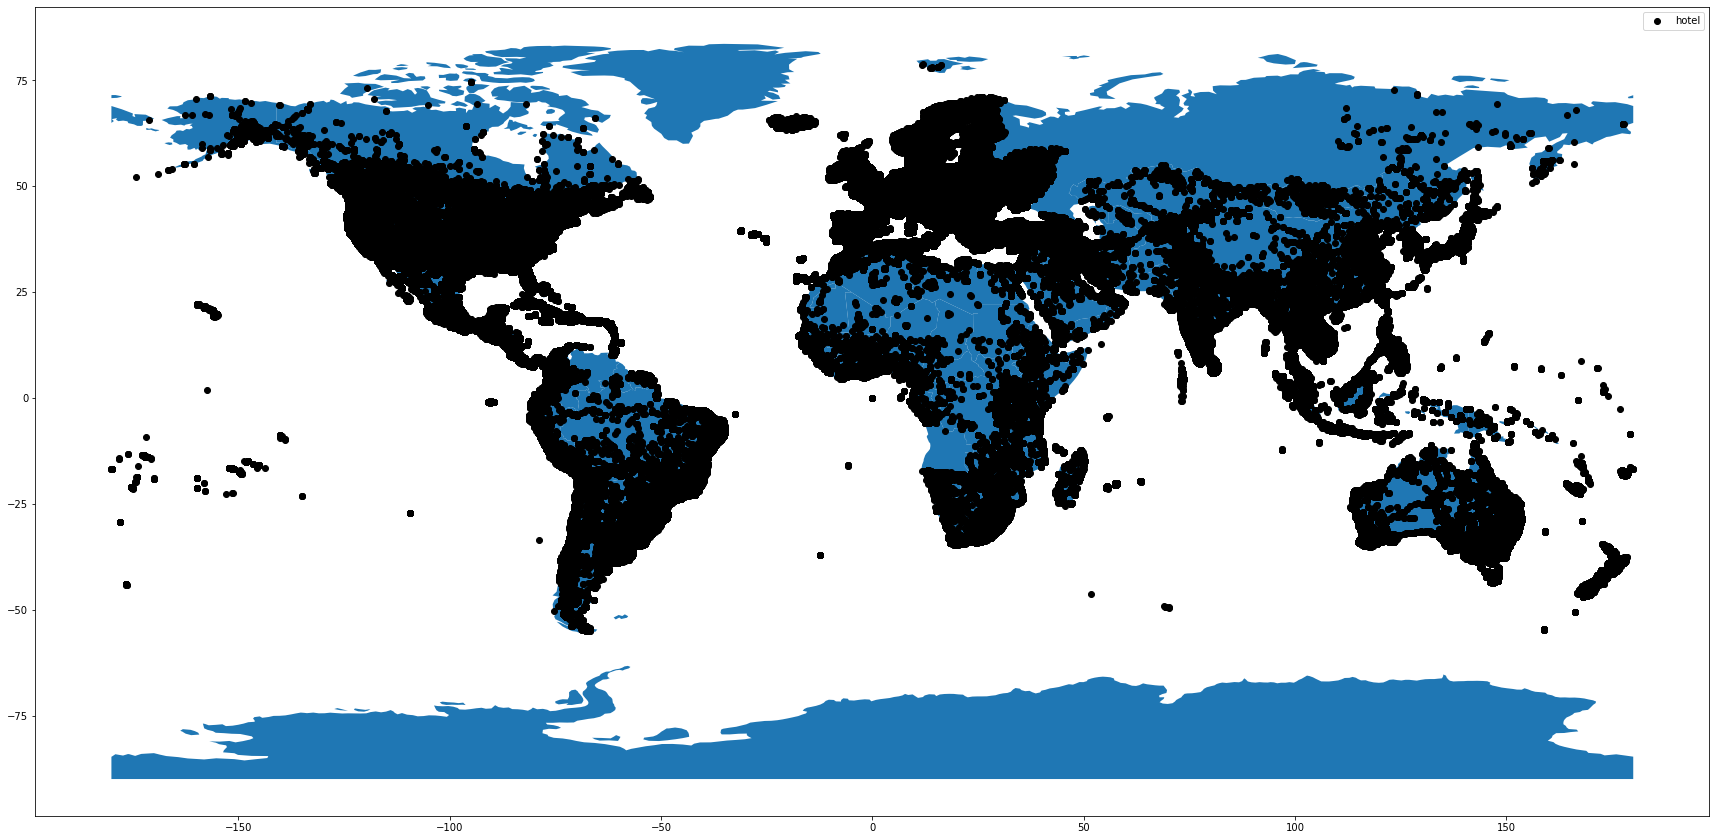

In [31]:
world.plot(figsize=(30, 30))
plt.scatter(x=res['LON'], y=res['LAT'],color='black',label='hotel')
plt.legend()

In [74]:
res.iloc[320000]

NAME                                                   Adagio
CATEGORY                                        ACCOMMODATION
SUBCATEGORY                                             HOTEL
LON                                                  -1.54615
LAT                                                   47.2169
WKT            POINT (-1.5461466000000001 47.216945700000004)
Name: 320000, dtype: object

In [75]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="google")
location = geolocator.reverse("47.2169,-1.54615")
print(location.address)

Adagio, 19, Allée Commandant Charcot, Richebourg, Richebourg - Saint-Clément, Malakoff - Saint-Donatien, Nantes, Loire-Atlantique, Pays de la Loire, France métropolitaine, 44000, France


In [58]:
for x,y in zip(res['LAT'],res['LON']):
    geolocator = Nominatim(user_agent="http")
    location = geolocator.reverse(str(x)+','+str(y))
    print(location.address)


1

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import unidecode
from selenium import webdriver

In [6]:
driver = webdriver.Chrome('./chromedriver')
driver.maximize_window()
driver.get(f'https://fr.hotels.com/search.do?destination-id=504261&q-check-in=2021-05-15&q-check-out=2021-05-18&q-rooms=1&q-room-0-adults=2&q-room-0-children=0&sort-order=PRICE')
pageSource = driver.find_element_by_xpath('//ul[@class="_3f26d2"]')
print(pageSource)
"""fileToWrite = open("page_source.html", "w")
fileToWrite.write(pageSource)
fileToWrite.close()
fileToRead = open("page_source.html", "r")
print(fileToRead.read())
fileToRead.close()"""
driver.quit()
    

<selenium.webdriver.remote.webelement.WebElement (session="e814b33394d3dcc680b5b7c6e583b6e4", element="6dc95d20-2d7a-416e-976a-84751629aef9")>


In [8]:
pageSource

<selenium.webdriver.remote.webelement.WebElement (session="e814b33394d3dcc680b5b7c6e583b6e4", element="6dc95d20-2d7a-416e-976a-84751629aef9")>